<a href="https://colab.research.google.com/github/prodramp/DeepWorks/blob/main/ruDALL-E/RuDALL_E_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sberbank-ai/ru-dalle

Cloning into 'ru-dalle'...
remote: Enumerating objects: 658, done.
remote: Total 658 (delta 0), reused 0 (delta 0), pack-reused 658
Receiving objects: 100% (658/658), 21.44 MiB | 42.55 MiB/s, done.
Resolving deltas: 100% (379/379), done.


In [2]:
!pip install rudalle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 248 kB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 79 kB 6.8 MB/s 
     |████████████████████████████████| 60.3 MB 1.2 MB/s 
     |████████████████████████████████| 1.7 MB 67.3 MB/s 
     |████████████████████████████████| 4.4 MB 55.8 MB/s 
     |████████████████████████████████| 66 kB 6.0 MB/s 
     |████████████████████████████████| 2.8 MB 59.6 MB/s 
     |████████████████████████████████| 45 kB 4.3 MB/s 
     |████████████████████████████████| 244 kB 70.5 MB/s 
     |████████████████████████████████| 58 kB 7.1 MB/s 
     |████████████████████████████████| 585 kB 64.0 MB/s 
     |████████████████████████████████| 596 kB 28.3 MB/s 
     |████████████████████████████████| 117 kB 76.6 MB/s 
     |████████████████████████████████| 140 kB 68.2 MB/s 
     |████████████████████████████████| 419

In [4]:
!cat ru-dalle/requirements.txt

taming-transformers==0.0.1
more_itertools~=8.12.0
transformers~=4.10.2
youtokentome~=1.0.6
omegaconf>=2.0.0
einops~=0.3.2
PyWavelets==1.1.1
segmentation-models-pytorch==0.1.3
opencv-python==4.5.4.60
torch
torchvision
matplotlib


In [5]:
!pip install -r ru-dalle/requirements.txt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!ls -lah ru-dalle

total 88K
drwxr-xr-x 7 root root 4.0K Jun 14 06:32 .
drwxr-xr-x 1 root root 4.0K Jun 14 06:32 ..
-rw-r--r-- 1 root root   83 Jun 14 06:32 .coveragerc
-rw-r--r-- 1 root root 5.0K Jun 14 06:32 Emojich.md
drwxr-xr-x 8 root root 4.0K Jun 14 06:32 .git
-rw-r--r-- 1 root root 2.4K Jun 14 06:32 .gitignore
-rw-r--r-- 1 root root  417 Jun 14 06:32 .gitlab-ci.yml
drwxr-xr-x 2 root root 4.0K Jun 14 06:32 jupyters
-rw-r--r-- 1 root root  12K Jun 14 06:32 LICENSE.txt
drwxr-xr-x 4 root root 4.0K Jun 14 06:32 pics
-rw-r--r-- 1 root root  582 Jun 14 06:32 .pre-commit-config.yaml
-rw-r--r-- 1 root root 5.7K Jun 14 06:32 README.md
-rw-r--r-- 1 root root   49 Jun 14 06:32 requirements-test.txt
-rw-r--r-- 1 root root  228 Jun 14 06:32 requirements.txt
drwxr-xr-x 6 root root 4.0K Jun 14 06:32 rudalle
-rw-r--r-- 1 root root  242 Jun 14 06:32 setup.cfg
-rw-r--r-- 1 root root 2.0K Jun 14 06:32 setup.py
drwxr-xr-x 2 root root 4.0K Jun 14 06:32 tests


In [1]:
from rudalle import get_rudalle_model, get_tokenizer, get_vae, get_realesrgan

In [2]:
from rudalle.pipelines import generate_images, show, super_resolution

In [40]:
import torch
print('Torch', torch.__version__, 'CUDA', torch.version.cuda)
print('Device:', torch.device('cuda:0'))

Torch 1.11.0+cu113 CUDA 11.3
Device: cuda:0


In [41]:
device = 'cuda:0'

In [5]:
tokenizer = get_tokenizer()
#dalle = get_rudalle_model('Malevich', pretrained=True, fp16=True, device=device) 
vae = get_vae().to(device)

tokenizer --> ready
Working with z of shape (1, 256, 32, 32) = 262144 dimensions.
vae --> ready


In [35]:
text = 'a penguin is on a glacier in the ocean'


In [13]:
pil_images, _ = generate_images(text, tokenizer, dalle, vae, top_k=1024, top_p=0.99, images_num=6)

  0%|          | 0/1024 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/rudalle/dalle/model.py:89: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim


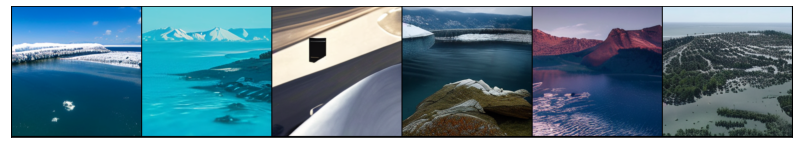

In [14]:
show(pil_images, 6)

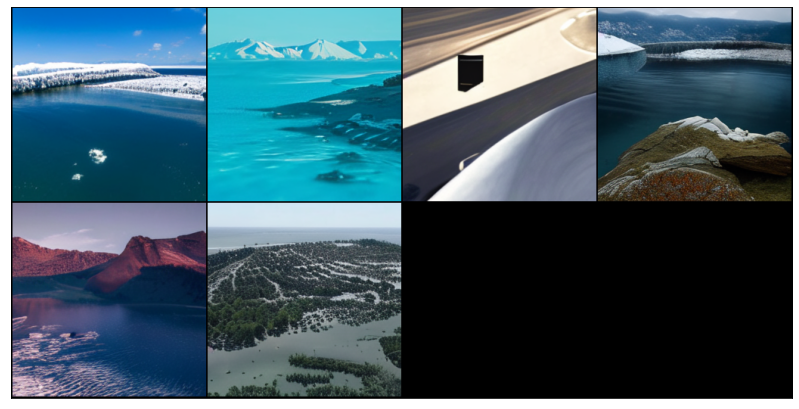

In [15]:
show(pil_images)

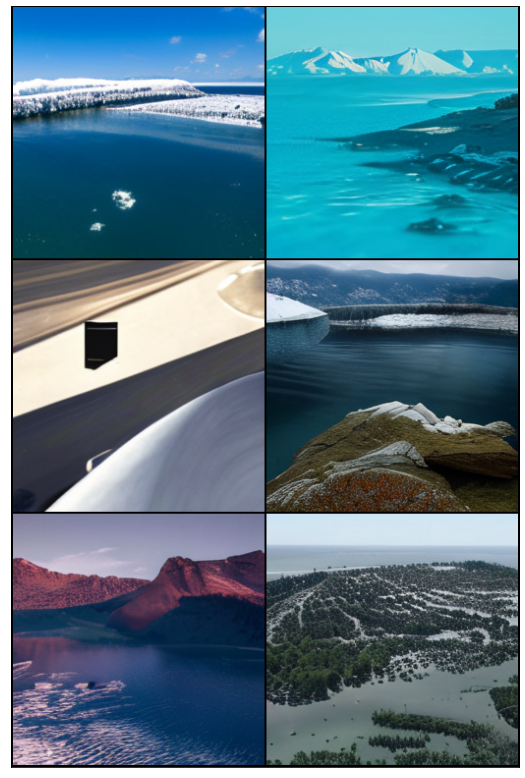

In [16]:
show(pil_images, 2)

In [17]:
realesrgan = get_realesrgan('x2', device=device)

Downloading:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

x2 --> ready


In [18]:
super_images = super_resolution(pil_images, realesrgan)

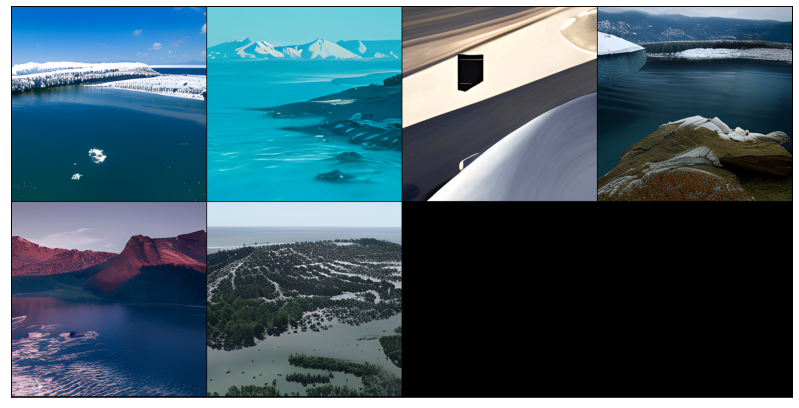

In [19]:
show(super_images)

In [35]:
dalle_emoji = get_rudalle_model('Emojich', pretrained=True, fp16=True, device=device) 

😋 Emojich is a 1.3 billion params model from the family GPT3-like, it generates emoji-style images with the brain of ◾ Malevich.


In [38]:
text_emoji = 'funny book'

In [37]:
pil_images_emoji, _ = generate_images(text_emoji, tokenizer, dalle_emoji, vae, top_k=1024, top_p=0.99, images_num=6)

  0%|          | 0/1024 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/rudalle/dalle/model.py:89: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim


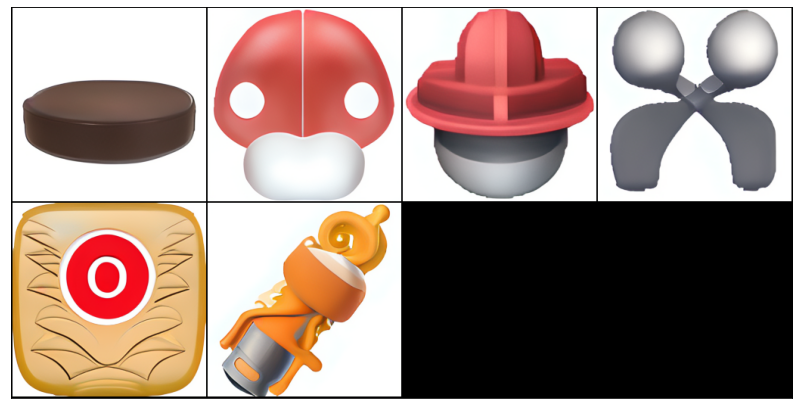

In [38]:
show(pil_images_emoji)

In [45]:
# Surrealist

In [46]:
!git clone https://github.com/shonenkov-AI/rudalle-aspect-ratio

Cloning into 'rudalle-aspect-ratio'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 48 (delta 21), reused 37 (delta 10), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [47]:
import sys
sys.path.insert(0, './rudalle-aspect-ratio')
from rudalle_aspect_ratio import RuDalleAspectRatio, get_rudalle_model

In [48]:
dalle = get_rudalle_model('Surrealist_XL', fp16=True, device=device)

Downloading:   0%|          | 0.00/2.62G [00:00<?, ?B/s]

Surrealist is 1.3 billion params model from the family GPT3-like, that was trained on surrealism and Russian.


In [49]:
rudalle_ar = RuDalleAspectRatio(
    dalle=dalle, vae=vae, tokenizer=tokenizer,
    aspect_ratio=32/9, bs=4, device=device
)

In [50]:
_, result_pil_images = rudalle_ar.generate_images('готический квартал', 1024, 0.975, 4)

  0%|          | 1/1024 [00:01<29:29,  1.73s/it]/usr/local/lib/python3.7/dist-packages/rudalle/dalle/model.py:89: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim
100%|██████████| 1024/1024 [00:34<00:00, 29.98it/s]


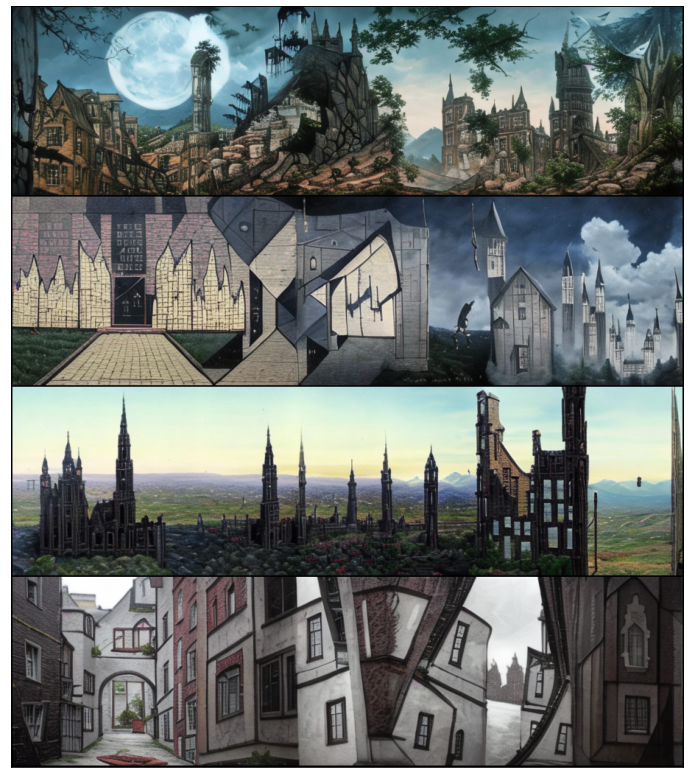

In [52]:
show(result_pil_images, 1)

In [53]:
rudalle_ar_9_32 = RuDalleAspectRatio(
    dalle=dalle, vae=vae, tokenizer=tokenizer,
    aspect_ratio=9/32, bs=4, device=device
)

In [54]:
_, result_pil_images_new = rudalle_ar_9_32.generate_images('Haunted House', 1024, 0.975, 2)

  0%|          | 0/114 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/rudalle/dalle/model.py:89: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dtype=torch.long, device=self.device) // self.image_tokens_per_dim
100%|██████████| 114/114 [02:54<00:00,  1.53s/it]


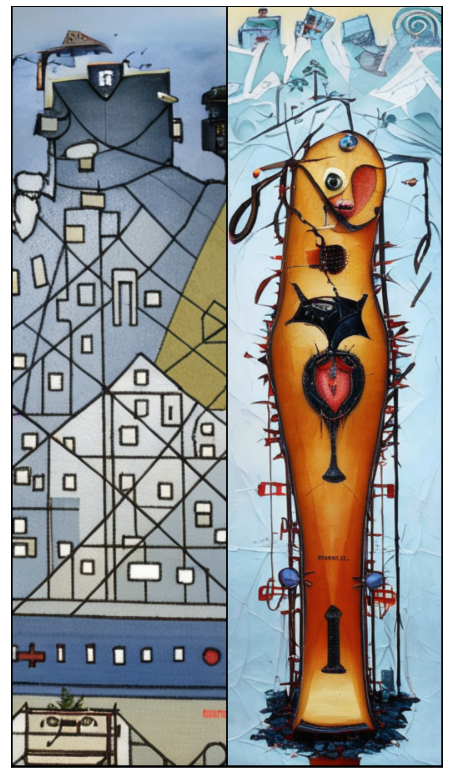

In [55]:
show(result_pil_images_new)